# KAGGLE COMPETITION DIAMOND

![image](diamante.jpg)


In [2]:
# IMPORTAMOS LIBRERIAS
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# CARGAMOS DATASET DE KAGGLE

df = pd.read_csv("diamonds_train.csv", index_col=0)

In [4]:
# EXPLORAMOS EL DATASET, COMPROBAMOS NULOS, DUPLICADOS, TIPOS DE LAS COLUMNAS Y LO QUE NECESITEMOS

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40345 entries, 0 to 40344
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40345 non-null  float64
 1   cut      40345 non-null  object 
 2   color    40345 non-null  object 
 3   clarity  40345 non-null  object 
 4   depth    40345 non-null  float64
 5   table    40345 non-null  float64
 6   x        40345 non-null  float64
 7   y        40345 non-null  float64
 8   z        40345 non-null  float64
 9   price    40345 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


## IMPORTANTE!! NO podemos modificar el nro de filas.
### 40345 rows

In [5]:
df


,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997
...,...,...,...,...,...,...,...,...,...,...
40340,1.55,Premium,H,VS2,61.3,61.0,7.46,7.39,4.55,11708
40341,0.36,Ideal,D,SI1,60.6,56.0,4.58,4.63,2.79,619
40342,0.57,Very Good,I,VS2,62.2,55.0,5.33,5.34,3.32,1267
40343,1.01,Very Good,F,IF,59.6,62.0,6.47,6.56,3.88,9965


In [5]:
df.isnull().sum() #no tengo valores nulos


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
df.describe()

,carat,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.795652,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,0.470806,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,1.040000,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000
max,4.010000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


In [7]:
# compruebo mis columnas categoricas

# Cut, Color y  clarity 

for col in ['cut','color','clarity']:
    print('{} : {}'.format(col,df[col].unique()))
df.nunique()  #To check number of unique values in each feature

cut : ['Ideal' 'Very Good' 'Premium' 'Good' 'Fair']
color : ['H' 'D' 'F' 'G' 'I' 'E' 'J']
clarity : ['VS2' 'VVS2' 'VS1' 'IF' 'SI1' 'SI2' 'VVS1' 'I1']


carat        265
cut            5
color          7
clarity        8
depth        175
table        124
x            538
y            534
z            361
price      10386
dtype: int64

<AxesSubplot:>

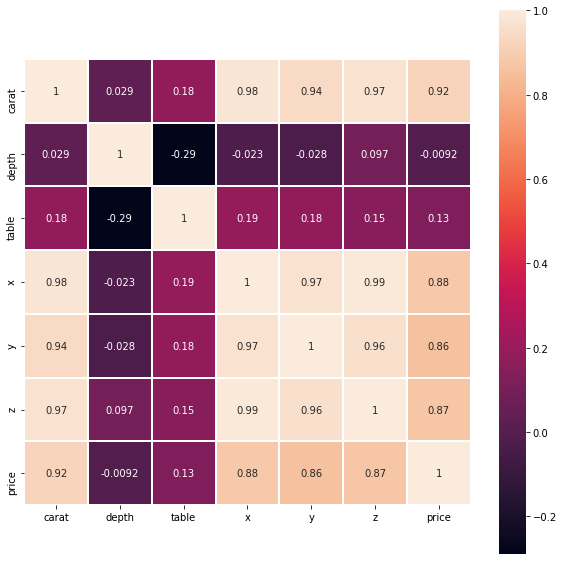

In [8]:
# compruebo la correlación entre las variables
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True,linewidth=2)

In [9]:
df.shape


(40345, 10)

In [10]:
# la correlacion que existe entre el precio, x, y y z. es alta, por lo que voy a crear otra columna que sea la multiplicacion de las 3, que me dará el volumen

In [6]:
df['volume'] = df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,volume
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134,190.734930
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532,45.921708
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103,69.338592
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600,43.362176
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997,176.802840


In [7]:
df.drop(['x','y','z'], axis=1, inplace= True)

In [8]:
df

,carat,cut,color,clarity,depth,table,price,volume
0,1.21,Ideal,H,VS2,63.0,57.0,6134,190.734930
1,0.28,Very Good,D,VVS2,64.0,56.0,532,45.921708
2,0.42,Premium,F,VS1,61.2,58.0,1103,69.338592
3,0.26,Ideal,H,IF,61.1,57.0,600,43.362176
4,1.10,Good,G,SI1,63.4,57.0,4997,176.802840
...,...,...,...,...,...,...,...,...
40340,1.55,Premium,H,VS2,61.3,61.0,11708,250.838770
40341,0.36,Ideal,D,SI1,60.6,56.0,619,59.163066
40342,0.57,Very Good,I,VS2,62.2,55.0,1267,94.494504
40343,1.01,Very Good,F,IF,59.6,62.0,9965,164.679616


In [9]:
# convierto columnas categoricas en numericas, usando label encoder

#Using LabelEncoder of scikit learn
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()

# mirar encoder
df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,1.21,2,4,5,63.0,57.0,6134,190.734930
1,0.28,4,0,7,64.0,56.0,532,45.921708
2,0.42,3,2,4,61.2,58.0,1103,69.338592
3,0.26,2,4,1,61.1,57.0,600,43.362176
4,1.10,1,3,2,63.4,57.0,4997,176.802840


In [11]:
df.shape

(40345, 8)

### ENTRENAMOS AL MODELO
#### Previamente hemos comprobado que continuamos con el mismo nro de filas

In [12]:
X = df.drop(['price','depth','table'],axis=1)
y = df['price']

In [29]:
# TRAIN TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=40)

In [30]:
#comprobamos
print("X_train:" , X_train.shape)
print("X_test:" , X_test.shape)
print("y_train:" , y_train.shape)
print("y_test:" , y_test.shape)

X_train: (36310, 5)
X_test: (4035, 5)
y_train: (36310,)
y_test: (4035,)


RANDOM FOREST REGRESSOR

In [32]:
import numpy as np 

In [33]:
RFreg_model = RandomForestRegressor(random_state=40)
RFreg_model.fit(X_train,y_train)
prediction2 = RFreg_model.predict(X_test)
rmse_RFreg = np.sqrt(mean_squared_error(y_test, prediction2))
print('RMSE value is = {}'.format(rmse_RFreg))
r2_RFreg = r2_score(y_test, prediction2)
print('R-squared value is {}'.format(r2_RFreg))

RMSE value is = 532.4322434423909
R-squared value is 0.9807051452400372


In [34]:
predictions = RFreg_model.predict(X_test)
print(predictions)

[ 7074.95       17527.65333333   912.685      ...  1111.31666667
  2629.423       6774.02      ]


## TRABAJAMOS CON DIAMOND TEST

In [35]:
X_pred = pd.read_csv("diamonds_test.csv", index_col = 0)
X_pred.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [36]:
X_pred.shape

(13449, 9)

In [37]:
X_pred['volume'] = X_pred['x']*X_pred['y']*X_pred['z']
X_pred.head()

,carat,cut,color,clarity,depth,table,x,y,z,volume
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65,51.771195
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79,56.244168
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56,260.964240
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68,50.478336
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63,242.355498


In [38]:
X_pred.drop(['x','y','z'], axis=1, inplace= True)

In [39]:
X_pred

,carat,cut,color,clarity,depth,table,volume
0,0.30,Ideal,H,SI2,60.0,56.0,51.771195
1,0.34,Ideal,D,IF,62.1,57.0,56.244168
2,1.57,Very Good,I,VS2,60.3,58.0,260.964240
3,0.31,Ideal,H,VS2,61.8,57.0,50.478336
4,1.51,Good,I,VVS1,64.0,60.0,242.355498
...,...,...,...,...,...,...,...
13444,1.05,Ideal,F,SI2,60.3,55.0,174.578460
13445,0.27,Very Good,G,VS1,61.9,56.0,43.982848
13446,1.50,Premium,D,VS2,61.8,60.0,243.718530
13447,1.70,Premium,F,SI2,60.2,61.0,278.794752


In [40]:
# convierto columnas categoricas en numericas, usando label encoder

#Using LabelEncoder of scikit learn
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


X_pred['cut'] = label_cut.fit_transform(X_pred['cut'])
X_pred['color'] = label_color.fit_transform(X_pred['color'])
X_pred['clarity'] = label_clarity.fit_transform(X_pred['clarity'])

In [43]:
X_pred.drop(["depth","table"], axis = 1)

,carat,cut,color,clarity,volume
0,0.30,2,4,3,51.771195
1,0.34,2,0,1,56.244168
2,1.57,4,5,5,260.964240
3,0.31,2,4,5,50.478336
4,1.51,1,5,6,242.355498
...,...,...,...,...,...
13444,1.05,2,2,3,174.578460
13445,0.27,4,3,4,43.982848
13446,1.50,3,0,5,243.718530
13447,1.70,3,2,3,278.794752


In [44]:
print(X)

       carat  cut  color  clarity      volume
0       1.21    2      4        5  190.734930
1       0.28    4      0        7   45.921708
2       0.42    3      2        4   69.338592
3       0.26    2      4        1   43.362176
4       1.10    1      3        2  176.802840
...      ...  ...    ...      ...         ...
40340   1.55    3      4        5  250.838770
40341   0.36    2      0        2   59.163066
40342   0.57    4      5        5   94.494504
40343   1.01    4      2        1  164.679616
40344   0.54    2      1        3   89.885120

[40345 rows x 5 columns]


In [45]:
X_pred = np.array(X_pred[['carat','cut','color','clarity','volume']])

In [46]:
print(X_pred)

[[  0.3        2.         4.         3.        51.771195]
 [  0.34       2.         0.         1.        56.244168]
 [  1.57       4.         5.         5.       260.96424 ]
 ...
 [  1.5        3.         0.         5.       243.71853 ]
 [  1.7        3.         2.         3.       278.794752]
 [  0.3        2.         0.         5.        49.153104]]


In [47]:
predictions_submit = RFreg_model.predict(X_pred)
predictions_submit

array([  422.796     ,  1615.75252381,  9556.25      , ...,
       14907.72      , 10170.23333333,   785.91316667])

In [48]:
sample = pd.read_csv("sample_submission.csv")

In [49]:
submission = pd.DataFrame({"id": range(len(predictions_submit)), "price": predictions_submit})

In [50]:
submission.head()

,id,price
0,0,422.796000
1,1,1615.752524
2,2,9556.250000
3,3,505.147952
4,4,9381.790000


In [51]:
import urllib.request
from PIL import Image

In [52]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.


    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")

In [53]:
chequeator(submission)

You're ready to submit!
